# Perceptron and Neural Networks

## 1. Perceptron

퍼셉트론은 여러 자극을 입력받아 가공하여 출력하는 단일 신경 알고리즘이다. 다음과 같은 구조를 가진다.   
![perceptron](./images/perceptron.png)

- > $x_i$:  $i$ th input              
  > $\mathbf{x}^T$: transpose of the input vector  
  > $w_i$: weight of $i$th input,   
  > $\mathbf{w}$: weight vector  
  > $b$: bias  
  > $h$: activation function  
  > $y$: output   
  > $y>\theta$ 일 경우에만 신호를 출력하게 한다. ($\theta$: threshold임계값)  
- 자극 발생을 Voltage로 보고 그로인해 입력 x로부터 perceptron에 흐르는 전류에 대한 저항값을 weight으로 볼 수 있다.
  $$
    V = I \Omega \quad \longleftrightarrow \quad x\cdot \omega = v
  $$  
  이 때, 일정한 전류에 가해지는 저항이 클 수록 발생하는 전위차가 선형으로 커지는 것처럼,
  일정한 입력값에 대한 가중치가 클 수록 수용하는 값도 커진다고 해석할 수 있다. 
  주의할 점은 음의 저항, 즉 부의 가중치도 고려할 수 있다는 점이다.
- 가중치는 각 입력이 perceptron 반응에 미치는 *상대적* 영향력을, 편향bias은 전체적으로 얼마나 *쉽게* 반응하는지 나타내는 척도라 할 수 있다.
- $\mathbf{x}^T \mathbf{w}$는 hyperplane의 level을 의미하므로 **단일** 퍼셉트론은 하이퍼플레인(2d에서는 직선)으로 분할 가능한 데이터셋(선형 데이터셋)을 분류할 수 있다.  
- 이진 분류에서 학습한다는 의미는 $\mathbf{w}$를 조정하여 적절한 하이퍼플레인을 찾아 데이터셋을 두 가지로 분류할 수 있음을 뜻한다. 
- 하지만, 그렇지 않은 비선형 데이터 셋은 분류 불가능한데, **다중** 퍼셉트론으로 해결할 수 있다. 
- 다중 퍼셉트론으로 `NAND` 게이트를 구현할 수 있고, 모든 논리게이트는 `NAND`게이트로 구현 가능하므로, 이론상 컴퓨터를 구현할 수 있다.
- 더 나아가 continuous valued function인 sigmoid함수를 활성함수로 사용하면 임의의 함수를 구현할 수 있다.

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

### 1.1 퍼셉트론의 간단한 예: Logic Gates

#### attributes, parameters
- `h`: $\quad$    activation function 으로서 step함수를 사용했다.
- `xw`:  $\quad\mathbf{x}^T \mathbf{w}$ 로서 가중합을 의미한다.
- `theta`: $\quad$   threshold, 임계값
- `b`:    $\quad=x_0$ 로서 bias 편향

In [2]:
def and_(x1, x2):
    w1, w2, b, theta = 1, 1, -1.5, 0
    x1 = np.array(x1)
    x2 = np.array(x2)
    xw = x1*w1 + x2*w2 + 1*b
    h = lambda xw: xw
    y = h(xw)
    return  y > theta

and_(0, 0), and_(1, 0), and_(0, 1), and_(1, 1), and_([0, 1, 0, 1], [0, 0, 1, 1])

(False, False, False, True, array([False, False, False,  True]))

In [3]:
x1 = [0, 1, 0, 1]
x2 = [0, 0, 1, 1]
def or_(x1, x2):
    w1, w2, b, theta = 1, 1, -0.5, 0
    x1 = np.array(x1)
    x2 = np.array(x2)
    xw = x1*w1 + x2*w2 + 1*b
    h = lambda xw: xw
    y = h(xw)
    return y > theta

or_(x1, x2)

array([False,  True,  True,  True])

In [4]:
array = np.random.randint(0, 3, (2, 4, 3))
def not_(x1):
    w1, w2, b, theta = -1, 1, 0.5, 0
    x1 = np.array(x1)
    x2 = np.zeros(x1.shape)
    xw = x1*w1 + x2*w2 + 1*b
    h = lambda xw: xw
    y = h(xw)
    return (y > theta)
not_(array), not_(array.astype(bool))

(array([[[ True, False, False],
         [False,  True, False],
         [ True, False, False],
         [False,  True, False]],
 
        [[False, False,  True],
         [False, False, False],
         [False,  True,  True],
         [False, False,  True]]]),
 array([[[ True, False, False],
         [False,  True, False],
         [ True, False, False],
         [False,  True, False]],
 
        [[False, False,  True],
         [False, False, False],
         [False,  True,  True],
         [False, False,  True]]]))

In [5]:
def not_(x):
    x = 1- np.array(x).astype(bool)
    return x.astype(bool) 
x1, not_(x1), not_(array.astype(bool))

([0, 1, 0, 1],
 array([ True, False,  True, False]),
 array([[[ True, False, False],
         [False,  True, False],
         [ True, False, False],
         [False,  True, False]],
 
        [[False, False,  True],
         [False, False, False],
         [False,  True,  True],
         [False, False,  True]]]))

### 1.2 Affine Matrix 곱으로 변환하기
- bias 항을 따로 계한하는 대신 $x_0=1$, $w_0=b$로 두고 한꺼번에 행렬 계산하는 것이 유리할 수 있다.  
  
$$\mathbf{x} = \begin{bmatrix}
1 \\
x_0 \\
x_1
\end{bmatrix}, \quad \mathbf{w} = \begin{bmatrix}
b \\
w_1 \\
w_2
\end{bmatrix}, \quad \mathbf{x}^T \mathbf{w} = \begin{bmatrix}
1 & x_0 & x_1 \end{bmatrix} \begin{bmatrix}
b \\
w_0 \\
w_1
\end{bmatrix}$$  

- input이 여럿(레코드가 다수)일 경우, $\mathbf{x}T$를 `vstack`하여 $\mathbf{X}$를 구성한다.  
- output이 여럿(label이 다수)일 경우, $\mathbf{w}$를 `hstack`하여 $\mathbf{W}$를 구성한다.
$$\mathbf{X} = \begin{bmatrix}
 & \vdots &  \\
\text{---} & \mathbf{x_i}^T & \text{---} \\
 & \vdots &  \\
\end{bmatrix}, \quad \mathbf{W}= \begin{bmatrix}
& \vert & \\
\ldots& \mathbf{w_j} & \ldots \\
& \vert& \end{bmatrix}, \quad \mathbf{X}\mathbf{W} = \begin{bmatrix}
 & \vdots &  \\
\text{---} & \mathbf{x_i}^T & \text{---} \\
 & \vdots &  \\
\end{bmatrix} \begin{bmatrix}
& \vert & \\
\ldots& \mathbf{w_j} & \ldots \\
& \vert& \end{bmatrix} $$  

- 따라서 $\mathbf{X}$ 의 `shape`은 `(레코드 수, 특성 수)`, $\mathbf{W}$ 의 `shape`은 `(특성 수, output 수)`가 된다.
  > r records, f features(bias 항도 포함한 숫자일 때), t outputs 이면,
  > `(r, f)` $\times$ `(f, t)` $\rightarrow$ `(r, t)`

- NAND 게이트의 경우, [`True-T-1`]와 [`False-F-0`], 그리고 bias를 포함하는 세 가지 feature를 입력값으로 받고,  
  (F, T), (T, T), (F, F), (T, F) 의 4개 경우를 판단해야 하므로 4 records,  
  `T` 또는 `F`로 결과를 판단하게 되므로 1 output을 낸다. 즉,  
  4 records, 3 features, 1 output 이므로, `X.shape` = (4, 3), `W.shape` = (3, 1)
  ```python
  w_ = [b, w1, w2]
  x0 = np.ones(4)
  X = np.vstack([x0, x1, x2]).T
  xw = X.dot(w_) 
  ```
#### attributes, parameters
- `w_`: $\quad$ $\mathbf{w}$, bias를 첫번째 엘리먼트로하여 구성된 weight vector(column벡터)
- `X`: $\quad$  $\mathbf{X}$, 즉 `1`을 첫번째 특성으로하는 $\mathbf{x}^T$ 들(row벡터들)을 vstack시켜 구성한 input matrix. 
- `xw`: $\quad$ $\mathbf{X}\cdot \mathbf{w}$ 

In [6]:
w1, w2, b, theta = -1, -1, 1.5, 0
w_ = [b, w1, w2]

x0 = np.ones(4)
X = np.vstack([x0, x1, x2]).T
w_, X
# xw = X.dot(w_)

([1.5, -1, -1],
 array([[1., 0., 0.],
        [1., 1., 0.],
        [1., 0., 1.],
        [1., 1., 1.]]))

In [7]:
def nand_(x1, x2):
    w1, w2, b, theta = -1, -1, 1.5, 0
    w_ = [b, w1, w2]
    
    x0 = np.ones(4)
    X = np.vstack([x0, x1, x2]).T
    
    xw = X.dot(w_)
    h = lambda xw: xw
    y = h(xw)
    return  y > theta

nand_(x1, x2)

array([ True,  True,  True, False])

In [8]:
# 같은 결과를  내놓고 있다.
def nand_(x1, x2):
    return np.logical_not(and_(x1, x2))

nand_(x1, x2)

array([ True,  True,  True, False])

In [9]:
def nor_(x1, x2):
    return np.logical_not(or_(x1, x2))

def nor_(x1, x2):
    w1, w2, b, theta = -1, -1, 0.5, 0
    w_ = [b, w1, w2]
    x0 = np.ones(4)
    X = np.vstack([x0, x1, x2]).T
    xw = X.dot(w_)
    h = lambda xw: xw
    y = h(xw)
    return y > theta

nor_(x1, x2)     

array([ True, False, False, False])

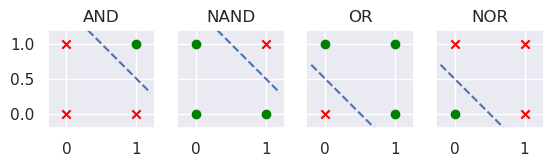

In [10]:
%matplotlib inline

pts = np.vstack([x1, x2])
results = [and_(*pts), nand_(*pts), or_(*pts), nor_(*pts)]
b = [1.5, 1.5, 0.5, 0.5]
titles = ['AND', 'NAND', 'OR', 'NOR']
x = np.linspace(-.2, 1.2)


fig, axes = plt.subplots(1, 4, sharey=True)

for i in range(4):
    axes[i].scatter(*pts.T[results[i]].T, color='green')
    axes[i].scatter(*pts.T[np.logical_not(results[i])].T, color='red', marker='x')
    axes[i].plot(x,  b[i] - x, 'b--')
    axes[i].set_aspect('equal', 'box')
    axes[i].set_title(titles[i])
    axes[i].set_ylim(-0.2, 1.2)

plt.show()

In [11]:
# (NAND) AND (OR) = XOR
def xor_(x1, x2):
    return and_(nand_(x1, x2), or_(x1, x2))

x1 = np.array(x1)
x2 = np.array(x2)
xor_(x1, x2), xor_(x1.astype(bool), x2.astype(bool)) # 입력이 int이든 bool이든 상관없이 계산된다.

(array([False,  True,  True, False]), array([False,  True,  True, False]))

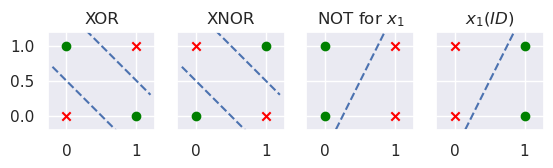

In [12]:
%matplotlib inline
def xnor_(x1, x2):
    return not_(xor_(x1, x2))

results = [xor_(*pts), xnor_(*pts)]
b = [1.5, 0.5]
titles = ['XOR', 'XNOR']
pts = pts.astype(bool)
fig, axes = plt.subplots(1, 4, sharey=True)

for i in range(2):
    axes[i].scatter(*pts.T[results[i]].T, color='green')
    axes[i].scatter(*pts.T[np.logical_not(results[i])].T, color='red', marker='x')
    axes[i].plot(x,  b[0] - x, 'b--')
    axes[i].plot(x,  b[1] - x, 'b--')
    axes[i].set_aspect('equal', 'box')
    axes[i].set_title(titles[i])
    axes[i].set_ylim(-0.2, 1.2)

axes[-2].scatter(*pts.T[not_(pts[0])].T, color='green')
axes[-2].scatter(*pts.T[not_(not_(pts[0]))].T, color='red', marker='x')
axes[-2].plot(x, -0.5 + 2*x, 'b--')
axes[-2].set_aspect('equal', 'box')
axes[-2].set_title('NOT for $x_1$')

axes[-1].scatter(*pts.T[(pts[0])].T, color='green')
axes[-1].scatter(*pts.T[not_(pts[0])].T, color='red', marker='x')
axes[-1].plot(x, -0.5 + 2*x, 'b--')
axes[-1].set_aspect('equal', 'box')
axes[-1].set_title('$x_1(ID)$')

plt.show()

### 1.2 Activation Function활성화 함수
지금까지 Logic perceptron에 사용한 활성화함수 $h(x) = x$는 항등함수이자, (threshold $\theta$룰 적용하므로) step function이었다.   

활성화함수는 퍼셉트론이 반응을 어떻게 하는지 그 특징을 규정한다고도 할 수 있어 다양한 활성화 함수가 사용되고 있다.

- Step function:
$$
h(x) = \begin{cases}
1, & \text{ if } x > 0, \\
0, & \text{otherwise}.
\end{cases}$$  
- ReLU :
$$
h(x) = \begin{cases}
x, & \text{ if } x > 0, \\
0, & \text{otherwise}. 
\end{cases}$$
- Sigmoid:
$$
h(x) = \frac{1}{1 + e^{-x}}
$$  
- Hyperbolic tangent:
$$
h(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$
- Softmax: 
    - $\quad$ 주로 출력노드 퍼셉트론에 사용되어 출력값들의 지수적 확률 분포를 구하는 함수로,   
    - $\quad$ 지수증가하는 $e^z$의 overflow를 방지하고자 다음처럼 상수 $C$를 도입하여 쓴다.
$$
\sigma(\mathbf{z_j}) = \frac{e^{z_j}}{\sum\limits_{k} e^{z_k}} = \frac{e^{(z_j-C)}}{\sum\limits_{k} e^{(z_k-C)}}, \quad \text{where  } C=\max\limits_{k}\{z_k\} 
$$

In [13]:
def step(x):
    x = np.array(x)
    x = x > 0
    return x.astype(int)

def relu(x):
    x = np.array(x)
    return np.maximum(0, x)

def sigmoid(x):
    x = np.array(x)
    return 1/(1 + np.exp(-x))

def tanh(x):
    x = np.array(x)
    x1 = np.exp(x)
    x0 = np.exp(-x)
    return (x1-x0)/(x1 + x0)

def softmax(z):
    z = np.array(z)
    ex = np.exp(z)
    return ex/np.sum(ex)

def softmax(z):
    z = np.array(z)
    c = np.max(z)
    ex = np.exp(z - c)
    return ex/np.sum(ex)


z = np.random.randint(-9, 10, (3, 4))
step(z), relu(z), sigmoid(z), tanh(z), np.sum(softmax(z))

(array([[1, 1, 1, 0],
        [1, 0, 0, 0],
        [1, 0, 1, 0]]),
 array([[3, 5, 6, 0],
        [4, 0, 0, 0],
        [5, 0, 4, 0]]),
 array([[9.52574127e-01, 9.93307149e-01, 9.97527377e-01, 1.23394576e-04],
        [9.82013790e-01, 1.23394576e-04, 6.69285092e-03, 5.00000000e-01],
        [9.93307149e-01, 9.11051194e-04, 9.82013790e-01, 1.79862100e-02]]),
 array([[ 0.99505475,  0.9999092 ,  0.99998771, -0.99999997],
        [ 0.9993293 , -0.99999997, -0.9999092 ,  0.        ],
        [ 0.9999092 , -0.99999834,  0.9993293 , -0.9993293 ]]),
 1.0000000000000002)

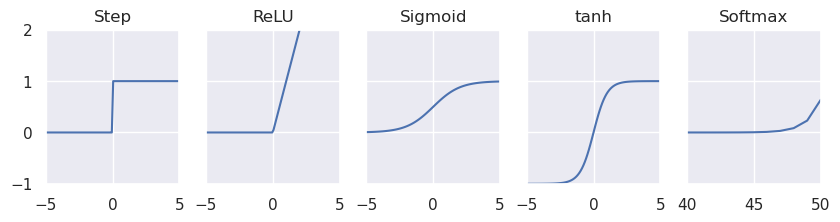

In [14]:
x = np.linspace(-5, 5, 100)
funcs = [step, relu, sigmoid, tanh, softmax]
titles = ['Step', 'ReLU', 'Sigmoid', 'tanh', 'Softmax']

fig, axes = plt.subplots(1, 5, figsize=(10, 2), sharey=True)

for i, axis in enumerate(axes):
    if i < 4:
        axis.set_xlim(-5, 5)
    else:
        x = np.linspace(-50, 50, 100)
        axis.set_xlim(40, 50)
        
    axis.plot(x, funcs[i](x))
    axis.set_aspect('auto', 'box')
    axis.set_title(titles[i])
    axis.set_ylim(-1, 2)
    axis.set_yticks([-1, 0, 1, 2])
plt.show()    

## 2. Neural Network
- 연결된 perceptron의 집합을 신경망,Neural Network, NN으로 부른다.
- 데이터가 n번째로 거쳐가는 perceptron의 집합을 nth-layer라 부른다.
- NN에서 가장 큰 n=L 에 대하여, 그 NN을 L-layered NN으로 부른다.
- XOR, XNOR 게이트는 2-layered NN 이고, AND, OR, NOT, NAND, NOR, ID는 1-layered NN 이다. 다음 도식을 보면,
- 최종레이어인 출력 레이어(4)와 입력값을 받는 입력레이어(1)를 제외하고 나머지는 hidden layer라고 부른다. (0은 레이어가 아니다.)

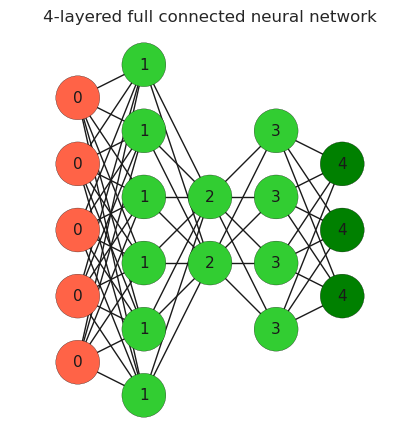

In [15]:
# plot multipartite graph
# https://networkx.org/documentation/stable/auto_examples/drawing/plot_multipartite_graph.html#sphx-glr-auto-examples-drawing-plot-multipartite-graph-py

import itertools
import matplotlib.pyplot as plt
import networkx as nx

subset_sizes = [5, 6, 2, 4, 3]
subset_color = [
    "tomato",
    "limegreen",
    "limegreen",
    "limegreen",
    "green",
]
options = {
    "font_size": 11,
    "node_size": 1000,
    # "node_color": "pink",
    "edgecolors": "black",
    "linewidths": 0.2,
    "width": 1,
    # "alpha": 0.7,
}


def multilayered_graph(*subset_sizes):
    extents = nx.utils.pairwise(itertools.accumulate((0,) + subset_sizes))
    layers = [range(start, end) for start, end in extents] # [range(0, 5), range(5, 11), range(11, 13), range(13, 17), range(17, 20)]
    G = nx.Graph()
    for (i, layer) in enumerate(layers):
        G.add_nodes_from(layer, layer=i)    
    
    # print(G.nodes.data(True)) [(0, {'layer': 0}), (5, {'layer': 1}),..., (11, {'layer': 2}),...,(17, {'layer': 4}),..., {'layer': 4})]
    
    for layer1, layer2 in nx.utils.pairwise(layers):
        G.add_edges_from(itertools.product(layer1, layer2)) # [(0, 5), (0, 6),...
    return G


G = multilayered_graph(*subset_sizes)
color = [subset_color[data["layer"]] for v, data in G.nodes(data=True)]  # (0, {'layer': 0})  --> v=0, data={'layer': 0}
pos = nx.multipartite_layout(G, subset_key="layer")
labels = nx.get_node_attributes(G, 'layer')
plt.figure(figsize=(4, 4))
nx.draw(G, pos,labels=labels, node_color=color, with_labels=True, **options)
plt.title('4-layered full connected neural network')
plt.axis("equal")
plt.show()

### 2.1 분류 NN: MNIST
0 ~ 9 아라비아 숫자의 손글씨 데이터인 MNIST 데이터를 레이블에 맞게 분류하는 NN을 구현해 본다.

#### 2.1.1 데이터 수집 및 적재.

In [16]:
import os
import gzip
import pickle
from urllib.request import urljoin, urlretrieve
from symbol import file_input
from tkinter import image_names

/tmp/ipykernel_17894/2937802838.py:5: DeprecationWarning: The symbol module is deprecated and will be removed in future versions of Python
  from symbol import file_input


In [17]:
# constants 
url_base = "http://yann.lecun.com/exdb/mnist/"
files_dict = {                      # 해당 사이트에 있는 데이터 파일들 목록이다.
    "train_img": "train-images-idx3-ubyte.gz",
    "train_label": "train-labels-idx1-ubyte.gz",
    "test_img": "t10k-images-idx3-ubyte.gz",
    "test_label": "t10k-labels-idx1-ubyte.gz",
}
dataset_dir = "./dataset/"  # 데이터를 저장할 디렉토리
save_file = os.path.join(*dataset_dir.split("/"), "mnist.pkl") # 데이터를 저장할 파일 path.
train_num = 60000      # 훈련 데이터 수
test_num = 10000       # 테스트 데이터 수
img_dim = (1, 28, 28)   # (1, height, width) 으로 주의한다.
img_size = 784          # 1*28*28

In [18]:
# 1. download data to files
def _download(file_name):
    saving_path = os.path.join(*dataset_dir.split("/"), file_name) 
    
    if os.path.exists(saving_path):
        print(f"Skipped, for {file_name} already exists.")
        return None

    print("Downloading " + file_name + " ...", end=" " )
    urlretrieve(urljoin(url_base, file_name), saving_path)
    print("Done.")

def download_mnist():
    for f in files_dict.values():
        _download(f)

download_mnist()

Skipped, for train-images-idx3-ubyte.gz already exists.
Skipped, for train-labels-idx1-ubyte.gz already exists.
Skipped, for t10k-images-idx3-ubyte.gz already exists.
Skipped, for t10k-labels-idx1-ubyte.gz already exists.


In [19]:
# 2. load data from files
def _load(data):

    def wrapper(file_name):
        print("Converting " + file_name + " to NumPy Array ...")
        result = data(file_name)
        print("Done")
        return result

    return wrapper

@_load
def _img(file_name):
    saving_path = os.path.join(*dataset_dir.split("/"), file_name) 
    with gzip.open(saving_path, 'rb') as f:
        images =  np.frombuffer(f.read(), np.uint8, offset=16)
    images = images.reshape(-1, img_size)
    return images

@_load
def _label(file_name):
    saving_path = os.path.join(*dataset_dir.split("/"), file_name) 
    with gzip.open(saving_path, 'rb') as f:
        labels =  np.frombuffer(f.read(), np.uint8, offset=8)
    return labels
  

_img("train-images-idx3-ubyte.gz").shape, _label("train-labels-idx1-ubyte.gz").shape

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done


((60000, 784), (60000,))

In [20]:
# 3. convert loaded data to a dict of numpy arrays
def _convert_to_array_dict():
    dataset = {}
    dataset["train_img"] = _img(files_dict["train_img"])
    dataset["train_label"] = _label(files_dict["train_label"])
    dataset["test_img"] = _img(files_dict["test_img"])
    dataset["test_label"] = _label(files_dict["test_label"])

    return dataset

dataset = _convert_to_array_dict()
dataset.keys()

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done


dict_keys(['train_img', 'train_label', 'test_img', 'test_label'])

In [21]:
# 4. save to pickle files.
def mnist_to_pickle():
    download_mnist()
    dataset = _convert_to_array_dict()
    print("Creating pickle file ...", end=" ")
    with open(save_file, 'wb') as f:
        pickle.dump(dataset, f, -1) # pickle.HIGHEST_PROTOCOL ? -1
    print("Done.")


mnist_to_pickle()

Skipped, for train-images-idx3-ubyte.gz already exists.
Skipped, for train-labels-idx1-ubyte.gz already exists.
Skipped, for t10k-images-idx3-ubyte.gz already exists.
Skipped, for t10k-labels-idx1-ubyte.gz already exists.
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ... Done.


In [22]:
# 5. load mnist data from the saved pickle file.
def _to_one_hot_label(X):       # X = [5, 7, ...]
    T = np.zeros((X.size, 10))  # train (60000, 10), test (10000, 10)
    for i, row in enumerate(T):
        row[X[i]] = 1           # i=0th row: [0,0,0,0,0,1,0,...], X[i]=5

    return T

def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    """ MNIST Data Loading

    Parameters
    ----------
    normalize: 0~255의 이미지 픽셀 컬러값들을 0.0 ~ 1.0 사이의 값으로 정규화.
    one_hot_label: 
        True: One-hot label로 반환.
            즉, 3을 나타내는 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] 처럼 한 원소만
            1이고 나머지는 0 인 배열이다.
    flatten: 입력 이미지를 28x28 이 아닌 784 인 1차원 배열로 만든다.

    Returns
    -------
    (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)    
    """
    if not os.path.exists(save_file):
        mnist_to_pickle()

    with open(save_file, "rb") as f:
        dataset = pickle.load(f)

    if normalize:
        for key in ("train_img", "test_img"):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0

    if one_hot_label:
        dataset["train_label"] = _to_one_hot_label(dataset["train_label"])
        dataset["test_label"] = _to_one_hot_label(dataset["test_label"])
    
    if not flatten:
        for key in ("train_img", "test_img"):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)
            
    return (dataset["train_img"], dataset["train_label"]), \
        (dataset["test_img"], dataset["test_label"])

In [23]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=False, flatten=False, one_hot_label=False)
x_train[0].shape

(1, 28, 28)

#### 2.1.2 데이터 살펴보기
- 28 x 28 = 784 pixels의 gray 이미지
- 각 픽셀은 0 ~ 255, 즉 $2^8=256$ 8bit=1byte값을 가진다.
- 이미지 하나당 해당 인덱스와 대응하는 레이블에 정답 숫자가 저장되어있다.
- 0 ~ 9 로 10진 분류를 하게 된다.
- flatten, normalize, one-hot-encoding 옵션을 설정하여 데이터를 가공할 수 있다.

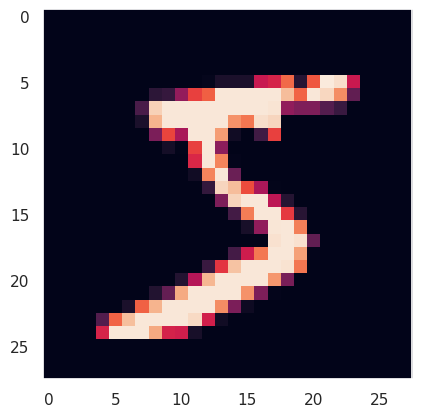

In [24]:
plt.imshow(x_train[0][0])
plt.grid(False)
plt.show()

#### 

#### 2.1.3 분류를 위한 신경망 구성하기

- 신경망을 클래스화하여 속성/기능을 모아놓자.
- 입력/히든/출력 1)레이어를 구현한다.
- 우선 순전파 과정을 구현한다. 즉, 2)predict함수, 3)accuracy만을 구현하고 학습과정은 제외한다.
  

In [25]:
# Stub class
class Network:
    def __init__(self):
        self.network = {}
        self.network['W1'] = np.array([[0.1, 0.2, 0.3], [0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        self.network['W2'] = np.array([[0.1, 0.2], [0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        self.network['W3'] = np.array([[0.1, 0.2], [0.1, 0.3], [0.2, 0.4]])

    def _affine(self, X):
        features = X.shape[-1]
        X = X.reshape(int(X.size/features), features) # inputted vector or matrix to matrix
        ones = np.ones((X.shape[0],1))       # (number of records, 1)
        return np.hstack((ones, X))


    def predict(self, X):
        # np.ones(X.shape[0])
        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        
        # 1-layer
        X = self._affine(X)
        a1 = np.dot(X, W1) # Affine
        z1 = sigmoid(a1)
        # 2-layer
        z1 = self._affine(z1)
        a2 = np.dot(z1, W2)
        z2 = sigmoid(a2)
        # 3-layer
        z2 = self._affine(z2)
        a3 = np.dot(z2, W3)
        y = softmax(a3)
        return y
    
net = Network()
x = np.array([1.0, 0.5])
y = net.predict(x)
y

array([[0.40625907, 0.59374093]])

In [26]:
class Network:
    def __init__(self, m_records, n_features, t_outputs):
        self.m_records = m_records
        self.n_features = n_features
        self.t_outputs = t_outputs
        self.network = {}
        self.network['W1'] = np.random.randn(n_features + 1, 100) # Affine +1
        self.network['W2'] = np.random.randn(100 + 1, 50)
        self.network['W3'] = np.random.randn(50 + 1, t_outputs)

    def _affine(self, X):
        features = X.shape[-1]
        X = X.reshape(int(X.size/features), features) # inputted vector or matrix to matrix
        ones = np.ones((X.shape[0],1))       # (number of records, 1)
        return np.hstack((ones, X))


    def predict(self, X):
        # np.ones(X.shape[0])
        W1, W2, W3 = self.network['W1'], self.network['W2'], self.network['W3']
        
        # 1-layer
        X = self._affine(X)
        a1 = np.dot(X, W1) # Affine
        z1 = sigmoid(a1)
        # 2-layer
        z1 = self._affine(z1)
        a2 = np.dot(z1, W2)
        z2 = sigmoid(a2)
        # 3-layer
        z2 = self._affine(z2)
        a3 = np.dot(z2, W3)
        y = softmax(a3)
        return y
    
    def accuracy(self, X, t):
        accuracy_cnt = 0
        for i in range(len(X)):
            y = self.predict(X[i])
            p = np.argmax(y)
            if p == t[i]:
                accuracy_cnt += 1
        print(accuracy_cnt)
        return float(accuracy_cnt)/len(X)

        
net = Network(1, 2, 2)
x = np.array([1.0, 0.5])
y = net.predict(x)
y

array([[0.27271623, 0.72728377]])

In [27]:
(_, _), (x, t) = load_mnist(normalize=True, flatten=False, one_hot_label=False)

net = Network(x.shape[-2], x.shape[-1], t.shape[-1])

print("Accuracy: ", net.accuracy(x, t))


0
Accuracy:  0.0
